In [4]:
%pylab inline
import numpy as np
import EXPtools as expt
import pyEXP

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
pyEXP.util.getVersionInfo()


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%% This is EXP 7.7.28 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%% Repository URL | https://github.com/EXP-code/EXP                         %
%%%%% Current branch | main                                                    %
%%%%% Current commit | 744df3d07ff213e38c67016cfb120793b25cb327                %
%%%%% Compile time   | 2024-04-17 10:55:42 EDT                                 %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



In [6]:
np.__version__

'1.26.2'

In [7]:
# Generate triaxial halo distribution 

In [8]:
npart = int(1e5)
rs = 1 # Hernquist scale length 
axis_ratios = [0.5, 0.7, 0.7] # Axis ratios of princial axis
Hern_halo = expt.utils.halo.ICHernquist(npart)

In [9]:
hern_tri = Hern_halo.triaxial(axis_ratios, rot_angle=30, rot_axis='z')

(-4.0, 4.0)

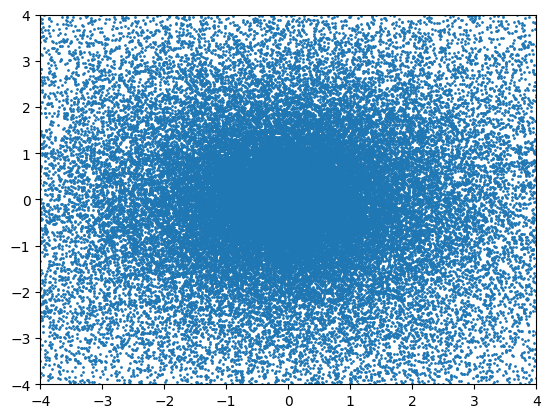

In [10]:
plt.scatter(hern_tri[:,1], hern_tri[:,2], s=1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

In [11]:
rh, rho = expt.basis_builder.makemodel.empirical_density_profile(hern_tri, np.ones(npart), rmin=0.0, rmax=4)
rhopw = expt.basis_builder.makemodel.powerhalo(np.linspace(0.0, 4, 500), alpha=1, beta=2)

/home/ngc/Work/research/codes/EXP/pyexp/lib/python3.10/site-packages/EXPtools/basis_builder/makemodel.py:72: RuntimeWarning: divide by zero encountered in divide
  return 1./(((ra+rc/rs)**alpha)*((1+ra)**beta))


In [12]:
np.sum(rho) 

4162132.4084129473

In [13]:
np.min(np.sqrt(np.sum(hern_tri**2, axis=1)))
np.median(np.sqrt(np.sum(hern_tri**2, axis=1)))

3.9318265966357053

In [14]:
len(np.where(np.sqrt(np.sum(hern_tri**2, axis=1)) <= 4)[0])

50504

In [15]:
np.sum(rho)/np.sum(rhopw) 

0.0

[]

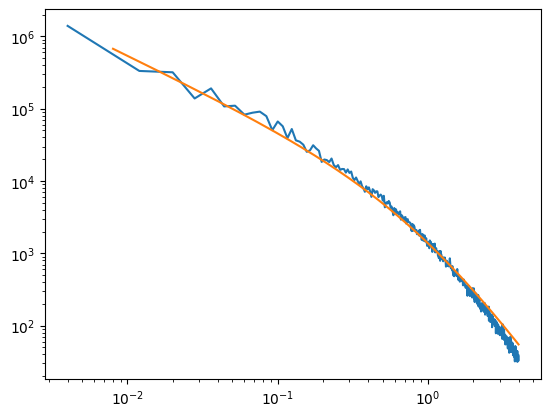

In [16]:
plt.plot(rh, rho)
plt.plot(np.linspace(0.0, 4, 500), rhopw*5498)
plt.loglog()

In [17]:
np.logspace(-2, 1)

array([ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
        0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
        0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
        0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
        0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
        0.33932218,  0.39069399,  0.44984327,  0.51794747,  0.59636233,
        0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
        1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
        2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
        5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ])

In [18]:
R, D, M, P = expt.basis_builder.makemodel.makemodel(expt.basis_builder.makemodel.powerhalo, rvals=np.logspace(-2, 1, 2000), M=1, funcargs=[1.0, 0, 1, 2])

! Scaling:  R= 10.0   M= 1
1.0 0.053452338244527206 0.053452338244527206 0.053452338244527206


[]

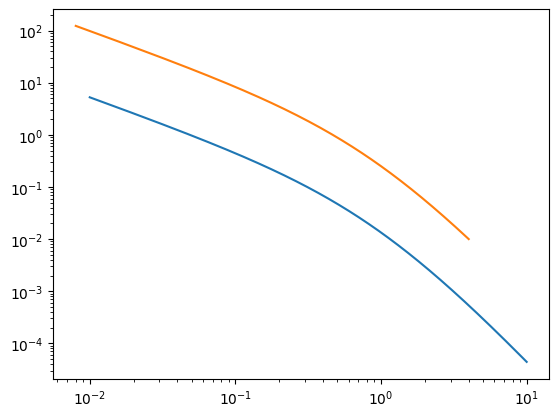

In [19]:
plt.plot(R, D)
plt.plot(np.linspace(0.0, 4, 500), rhopw)

plt.loglog()

In [20]:
basis, coefs = expt.basis_builder.makebasis(hern_tri, np.ones(npart), basis_model='powerlaw', rmax=4, nmax=10, modelname='htri_dens_table.txt',
                                            cachename='.slgrid_herntri_cache')

No config file provided.
Computing empirical density
---- SLGridSph::ReadH5Cache: successfully read basis cache <.slgrid_herntri_cache>
SphericalSL::orthoTest: worst=0.000696204
------------------------------------------------------------
Cache parameters for SLGridSph: .slgrid_herntri_cache
------------------------------------------------------------
model               : htri_dens_table.txt
lmax                : 4
nmax                : 10
numr                : 500
cmap                : 1
rmin                : 0.60999999999999999
rmax                : 4
rmapping            : 1
diverge             : 0
dfac                : 1
------------------------------------------------------------


HDF5-DIAG: Error detected in HDF5 (1.10.7) thread 1:
  #000: ../../../src/H5F.c line 333 in H5Fcreate(): invalid file name
    major: Invalid arguments to routine
    minor: Bad value
Unable to create file  (Invalid arguments to routine) Bad value


In [21]:
R, D, M, P = np.loadtxt('htri_dens_table.txt', skiprows=3, unpack=True)

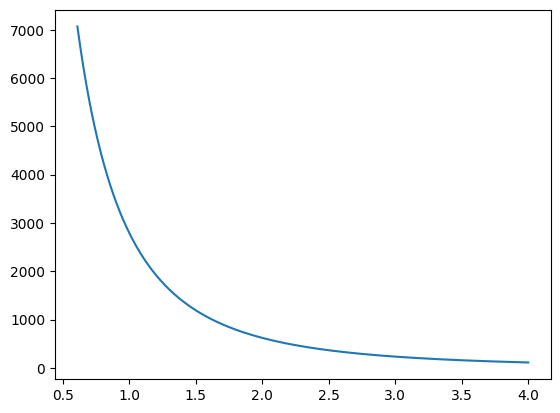

In [22]:
plt.plot(R, D)

In [27]:
sph_fields = expt.visuals.spherical_slice(basis, coefs, 100, 1)

In [31]:
rho_field = sph_fields[0]
rho0_field = sph_fields[1]

grid = sph_fields[-1]

In [37]:
sph_fields[1].shape

(100, 100)

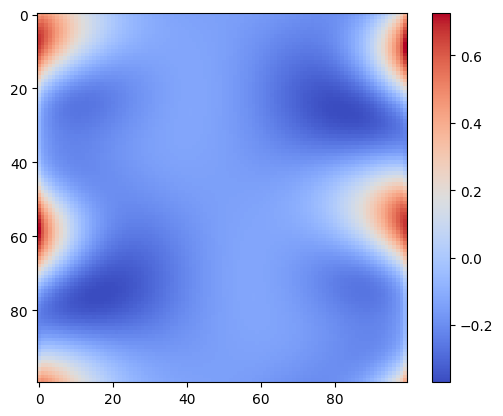

In [38]:
plt.imshow(rho_field/rho0_field - 1, cmap='coolwarm')
plt.colorbar()

In [55]:
l = grid[1]
b = grid[0]

In [56]:
l

array([[-3.14159265, -3.14159265, -3.14159265, ..., -3.14159265,
        -3.14159265, -3.14159265],
       [-3.07812614, -3.07812614, -3.07812614, ..., -3.07812614,
        -3.07812614, -3.07812614],
       [-3.01465962, -3.01465962, -3.01465962, ..., -3.01465962,
        -3.01465962, -3.01465962],
       ...,
       [ 3.01465962,  3.01465962,  3.01465962, ...,  3.01465962,
         3.01465962,  3.01465962],
       [ 3.07812614,  3.07812614,  3.07812614, ...,  3.07812614,
         3.07812614,  3.07812614],
       [ 3.14159265,  3.14159265,  3.14159265, ...,  3.14159265,
         3.14159265,  3.14159265]])

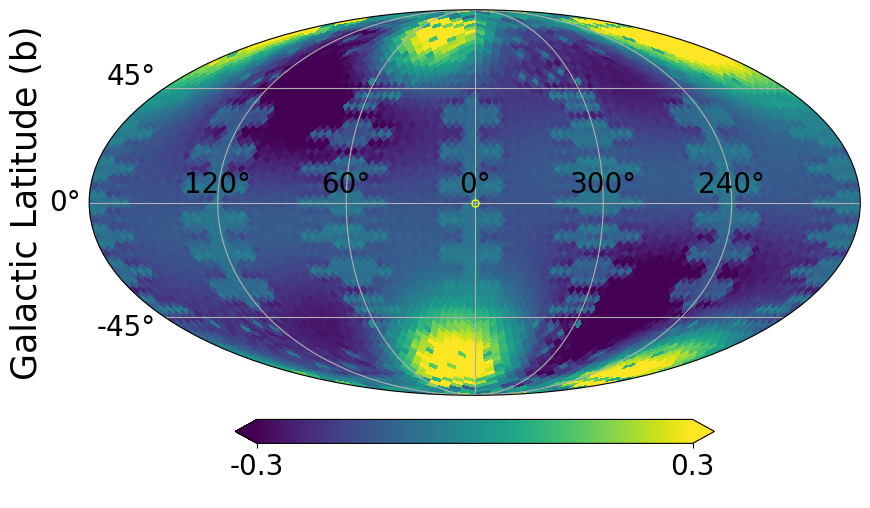

In [57]:
expt.visuals.projections.mollweide(l.flatten()*180/np.pi, b.flatten()*180/np.pi, q = rho_field.flatten()/rho0_field.flatten() -1, bmin=-0.3, bmax=0.3, l2=0, b2=0)